# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few.

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains more than 4 billion nodes that form the basis of the digitally mapped world that OSM provides ([stats from November 2017](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development (see more from [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org)).


## OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

- Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: a district of Kamppi in Helsinki, Finland.

OSMnx makes it really easy to do that as it allows you to specify an address to retrieve the OpenStreetMap data around that area. In fact, OSMnx uses the same Nominatim Geocoding API to do this, which we tested during the Lesson 2.

- Let's retrieve OpenStreetMap (OSM) data by specifying ``"Kamppi, Helsinki, Finland"`` as the address where the data should be downloaded.


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Okey, as we can see the data that we retrieved is a special data object called `networkx.classes.multidigraph.MultiDiGraph`. A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called [networkx](https://networkx.github.io/documentation/stable/) that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

- Let's see how our street network looks like. It is easy to visualize the graph with osmnx with `plot_graph()` function. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


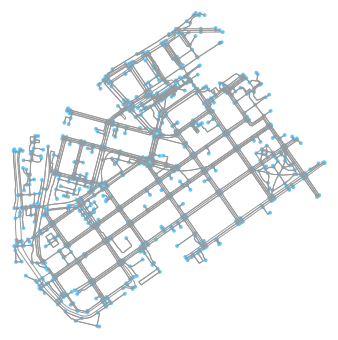

In [3]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains the nodes (blue circles) and the edges (gray lines) that connects those nodes to each other.

It is also possible to retrieve other types of OSM data features with osmnx such as buildings or points of interest (POIs).

- Let's download the buildings with `buildings_from_place()` -function and plot them on top of our street network in Kamppi. Let's also plot the Polygon that represents the area of Kamppi, Helsinki that can be retrieved with `gdf_from_place` -function.


In [4]:
# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)

# Retrieve buildings from the area
buildings = ox.buildings_from_place(place_name)

# What types are those?
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


As a result we got the data as GeoDataFrames. 

OSMnx has a nice function called `ox.pois_from_place()` that can be used in a similar manner as the previous function to retrieve specific POI data from OpenStreetMap such as `restaurants`. With parameter `amenities` we can pass a list of OSM amenity categories that we are interested in retrieving. 

- Let's also retrieve restaurants that are located on the area:

In [5]:
# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)

199

As we can see, there exist quite many restaurants in the area.

- Let's explore what kind of attributes we have in our restaurants GeoDataFrame

In [6]:
# Available columns
restaurants.columns

Index(['access:dog', 'addr:city', 'addr:country', 'addr:floor',
       'addr:housename', 'addr:housenumber', 'addr:place', 'addr:postcode',
       'addr:street', 'address', 'alt_name', 'amenity', 'brunch', 'capacity',
       'contact:email', 'contact:foursquare', 'contact:phone',
       'contact:website', 'contact:yelp', 'created_by', 'cuisine', 'delivery',
       'description', 'description:en', 'diet:vegan', 'diet:vegetarian',
       'element_type', 'email', 'entrance', 'established', 'geometry',
       'highchair', 'internet_access', 'is_in', 'layer', 'level', 'lunch',
       'name', 'name:en', 'name:fi', 'name:sv', 'name:zh', 'note', 'office',
       'opening_hours', 'opening_hours:brunch', 'opening_hours:lunch',
       'opening_hours:lunch_buffet', 'operator', 'osmid', 'outdoor_seating',
       'phone', 'ref:vatin', 'shop', 'smoking', 'source', 'takeaway',
       'toilets:wheelchair', 'url', 'was:name', 'website', 'website:en',
       'wheelchair', 'wheelchair:description', 'wikid

Wow, there exists quite a lot of information related to the POIs. One of the useful ones might be for example the `name`, `address information` and `opening_hours` information:

In [7]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']
# Print only selected cols
restaurants[cols].head(10)

name  \
60062502               Kabuki   
60133792         Ateljé Finne   
62965963         Empire Plaza   
62967659   Ravintola Pääposti   
68734026          Hampton Bay   
76617692         Johan Ludvig   
76624339  Ravintola Rivoletto   
76624351               Pueblo   
76627823               Atabar   
89074039          Papa Albert   

                                              opening_hours addr:city  \
60062502                                                NaN  Helsinki   
60133792                                                NaN  Helsinki   
62965963                                                NaN       NaN   
62967659                                                NaN  Helsinki   
68734026                                                NaN  Helsinki   
76617692                                                NaN  Helsinki   
76624339  Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...  Helsinki   
76624351                                                NaN  Helsinki   
76627823                                                NaN  Helsinki   
89074039  Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...  Helsinki   

         addr:country addr:housenumber addr:postcode        addr:street  
60062502           FI               12         00180    Lapinlahdenkatu  
60133792           FI              NaN           NaN                NaN  
62965963          NaN              NaN           NaN                NaN  
62967659          NaN              1 B         00100  Mannerheiminaukio  
68734026           FI                6         00120   Hietalahdenranta  
76617692           FI              NaN           NaN                NaN  
76624339           FI               38         00120       Albertinkatu  
76624351           FI              NaN           NaN        Eerikinkatu  
76627823           FI              NaN           NaN        Eerikinkatu  
89074039           FI               30         00120       Albertinkatu

As we can see, there exists a lot of useful information about restaurants that can be retrieved easily with OSMnx. 

We can now plot all these different OSM layers by using the familiar `plot()` function of Geopandas. As you might remember, the street network data was not in GeoDataFrame format (it was networkx.MultiDiGraph). Luckily, osmnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

- Let's extract the nodes and edges from the graph as GeoDataFrames:

In [8]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
            highway     osmid   ref        x        y  \
25216594       NaN  25216594   NaN  24.9211  60.1648   
25238874       NaN  25238874   NaN   24.921  60.1637   
25238883  crossing  25238883   NaN  24.9214  60.1635   
25238933  bus_stop  25238933  1168  24.9245  60.1611   
25238944       NaN  25238944   NaN  24.9213  60.1646   

                               geometry  
25216594  POINT (24.9210566 60.1647939)  
25238874  POINT (24.9210282 60.1636645)  
25238883  POINT (24.9214411 60.1634517)  
25238933   POINT (24.924529 60.1611136)  
25238944   POINT (24.9212859 60.164631)   

Edges:
   access bridge                                           geometry  \
0    NaN    NaN  LINESTRING (24.9253928 60.1664791, 24.925717 6...   
1    NaN    NaN  LINESTRING (24.9253928 60.1664791, 24.9254822 ...   
2    NaN    NaN  LINESTRING (24.9340047 60.1675525, 24.9339332 ...   
3    NaN    NaN  LINESTRING (24.9292726 60.1622912, 24.9294092 ...   
4    NaN    NaN  LINESTRING (24.9292726 60.

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

**Note:** There are also other ways of retrieving the data from OpenStreetMap with osmnx such as passing a Polygon to extract the data from that area, or passing a Point coordinates and retrieving data around that location with specific radius. Take a look of this [tutorial to find out how to use those features of osmnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb).

- Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

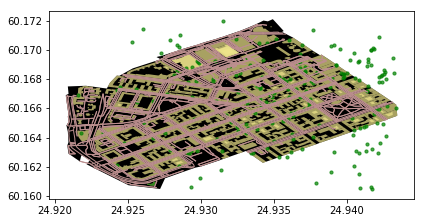

In [9]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Kamppi' in Helsinki. And all of this required only a few lines of code. Pretty neat! 
